In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

In [7]:
for col in categorical_columns:
    data[col + '_encoded'] = le.fit_transform(data[col])
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   CarName                 205 non-null    object 
 3   fueltype                205 non-null    object 
 4   aspiration              205 non-null    object 
 5   doornumber              205 non-null    object 
 6   carbody                 205 non-null    object 
 7   drivewheel              205 non-null    object 
 8   enginelocation          205 non-null    object 
 9   wheelbase               205 non-null    float64
 10  carlength               205 non-null    float64
 11  carwidth                205 non-null    float64
 12  carheight               205 non-null    float64
 13  curbweight              205 non-null    int64  
 14  enginetype              205 non-null    ob

In [9]:
data.drop(categorical_columns, axis=1, inplace=True)
print(data)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [10]:
data.shape

(205, 26)

In [11]:
#Split data into features (X) and target (y)
X = data.drop(['car_ID', 'price'], axis=1)  
y = data['price']

In [12]:
X.shape

(205, 24)

In [13]:
print(y.shape)

(205,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [15]:
scaler_X = MinMaxScaler()  
scaler_y = MinMaxScaler()

In [16]:
X_train = scaler_X.fit_transform(X_train)
y_train= scaler_y.fit_transform(y_train.values.reshape(-1, 1))
print(X_train)
print(X_train.shape)

[[0.4        0.63103448 0.52413793 ... 0.5        0.33333333 0.42857143]
 [0.4        0.73448276 0.72586207 ... 0.33333333 0.33333333 0.71428571]
 [0.4        0.3137931  0.43275862 ... 0.5        0.33333333 0.14285714]
 ...
 [0.6        0.27241379 0.35689655 ... 0.5        0.33333333 0.14285714]
 [1.         0.56206897 0.67068966 ... 0.         0.5        0.71428571]
 [0.4        0.47586207 0.68965517 ... 0.83333333 0.5        0.71428571]]
(164, 24)


In [17]:
print(y_train)
print(y_train.shape)

[[0.32833524]
 [0.25971898]
 [0.04468497]
 [0.05910829]
 [0.09872896]
 [0.02758056]
 [0.04803634]
 [0.29248796]
 [0.19477682]
 [0.02921901]
 [0.28399782]
 [0.04917829]
 [0.09507969]
 [0.05538454]
 [0.25152674]
 [0.08269202]
 [0.16699767]
 [0.79216524]
 [0.00672757]
 [0.10215481]
 [0.29991063]
 [0.15217715]
 [0.28263244]
 [0.13852341]
 [0.043121  ]
 [0.39352564]
 [0.05404399]
 [0.41954223]
 [0.12976019]
 [0.04518147]
 [0.32351919]
 [0.06169008]
 [0.02425401]
 [0.28739884]
 [0.10972643]
 [0.19430515]
 [0.18981183]
 [0.03850355]
 [0.07047813]
 [0.06183903]
 [0.33518693]
 [0.29112259]
 [0.32351919]
 [0.28255797]
 [0.02658756]
 [0.14721215]
 [0.06183903]
 [0.71769028]
 [0.04644754]
 [0.        ]
 [0.05404399]
 [0.29683233]
 [0.13596644]
 [0.03125465]
 [0.25798123]
 [0.21664763]
 [0.03502805]
 [0.29310858]
 [0.34337918]
 [0.07298545]
 [0.3125962 ]
 [0.08539794]
 [0.68045281]
 [0.2697731 ]
 [0.04984857]
 [0.3061417 ]
 [0.00697582]
 [0.18176853]
 [0.10865895]
 [0.28578521]
 [0.07186833]
 [0.28

In [18]:
X_test = scaler_X.transform(X_test)
y_test= scaler_y.transform(y_test.values.reshape(-1, 1))

In [19]:
print(X_test)
print(X_test.shape)

[[ 0.4         0.58275862  0.76551724  0.48571429  0.65833333  0.62794838
   0.54296875  0.77142857  0.62857143  0.0625      0.55084746  0.51020408
   0.09375     0.17647059  0.0890411   1.          0.          0.
   0.75        1.          0.          0.5         0.5         0.71428571]
 [ 0.4         0.44482759  0.57931034  0.58095238  0.35        0.54917668
   0.23828125  0.42142857  0.63333333  0.          0.45762712  0.55102041
   0.09375     0.17647059  0.05479452  1.          1.          1.
   0.5         0.          0.          0.5         0.16666667  0.71428571]
 [ 0.4         0.36551724  0.49655172  0.32380952  0.575       0.21495327
   0.1953125   0.56428571  0.66666667  0.09375     0.19067797  0.42857143
   0.4375      0.52941176  0.54109589  1.          0.          0.
   0.75        0.5         0.          0.5         0.33333333  0.14285714]
 [ 1.          0.43103448  0.72413793  0.44761905  0.69166667  0.37338674
   0.19921875  0.71428571  0.47619048  0.144375    0.245762

In [20]:
print(y_test)
print(y_test.shape)

[[6.36562236e-01]
 [3.16299265e-01]
 [1.09999504e-01]
 [1.67121791e-01]
 [5.74201877e-01]
 [6.65557817e-02]
 [6.62827069e-02]
 [1.02775433e-01]
 [1.26110918e-01]
 [6.59599821e-02]
 [2.02993893e-01]
 [7.74539497e-02]
 [3.26746438e-01]
 [1.20897671e-01]
 [8.89777072e-01]
 [3.40102279e-02]
 [8.19224468e-04]
 [1.86460454e-01]
 [7.62375254e-02]
 [1.20202572e-01]
 [8.38339705e-02]
 [2.08058190e-01]
 [7.77270245e-02]
 [3.37868030e-02]
 [3.90745246e-02]
 [8.98589941e-01]
 [1.12233752e-01]
 [2.05972891e-01]
 [7.15207785e-02]
 [1.94181024e-01]
 [5.07273720e-01]
 [2.75805571e-02]
 [6.90134551e-02]
 [4.06310511e-01]
 [6.38250335e-02]
 [5.72414478e-01]
 [1.52450226e-01]
 [1.44655181e-01]
 [9.42977012e-02]
 [2.32634924e-01]
 [5.82145872e-02]]
(41, 1)


In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
RMSE = np.sqrt(MSE)

In [25]:
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

print(model.intercept_)
print(model.coef_)

Mean Absolute Error (MAE): 0.053045540772359984
Mean Squared Error (MSE): 0.00774985487632253
Root Mean Squared Error (RMSE): 0.08803326005733589
0.9095056138704457
0.840707115149927
[-0.26791686]
[[ 0.01895311  0.12797266 -0.07563852  0.14843792  0.05950145  0.14914757
   0.50357504 -0.02933773 -0.10158299  0.36987241  0.10883589  0.07911664
  -0.12703945  0.06808837 -0.09844726  0.27171949  0.02780579 -0.03721215
  -0.11349819  0.04171253  0.28607566  0.04211124 -0.03789129  0.02293662]]


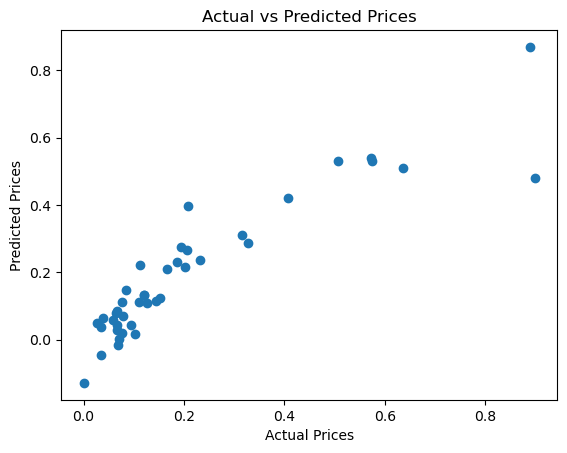

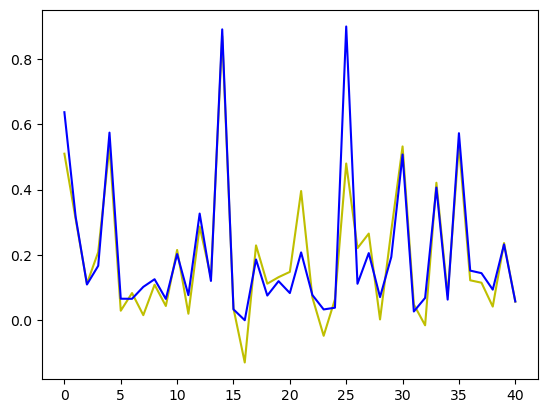

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

import matplotlib.pyplot as plt
plt.plot(y_pred,'y')
plt.plot(y_test,'b')
plt.show()

In [ ]:
#POLYNOMIAL REGRESSION

In [ ]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv(r"C:\Users\tajud\OneDrive\Desktop\NRIT\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
#convert cat into int
from sklearn.preprocessing import LabelEncoder
lab_obj = LabelEncoder()

data["fueltype"] = lab_obj.fit_transform(data["fueltype"])
data["aspiration"] = lab_obj.fit_transform(data["aspiration"])
data["doornumber"] = lab_obj.fit_transform(data["doornumber"])
data["carbody"] = lab_obj.fit_transform(data["carbody"])
data["drivewheel"] = lab_obj.fit_transform(data["drivewheel"])
data["enginelocation"] = lab_obj.fit_transform(data["enginelocation"])
data["enginetype"] = lab_obj.fit_transform(data["enginetype"])
data["cylindernumber"] = lab_obj.fit_transform(data["cylindernumber"])
data["fuelsystem"] = lab_obj.fit_transform(data["fuelsystem"])


#Drop unwanted columns 
data = data.drop("car_ID",axis=1)
data = data.drop("CarName",axis=1)

#Divide the features into independent and dependent variables in terms of X and Y
x = data.iloc[:, 0:-1]
y = data.iloc[:, [-1]]

In [33]:
#Feature Scaling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
x_scl = StandardScaler()
y_scl = StandardScaler()

x = x_scl.fit_transform(x)
y = y_scl.fit_transform(y)

In [35]:
# spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
# Create Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

#Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [39]:
model.score(x, y)

0.9987439877004747

In [41]:
model.score(x_poly_test, y_test)

0.9995444551320429

In [43]:
y_pred = model.predict(x_poly_test)

In [45]:
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(y_true=y_test,y_pred=y_pred)
RMSE

0.023795928412370923

<Axes: xlabel='wheelbase', ylabel='Count'>

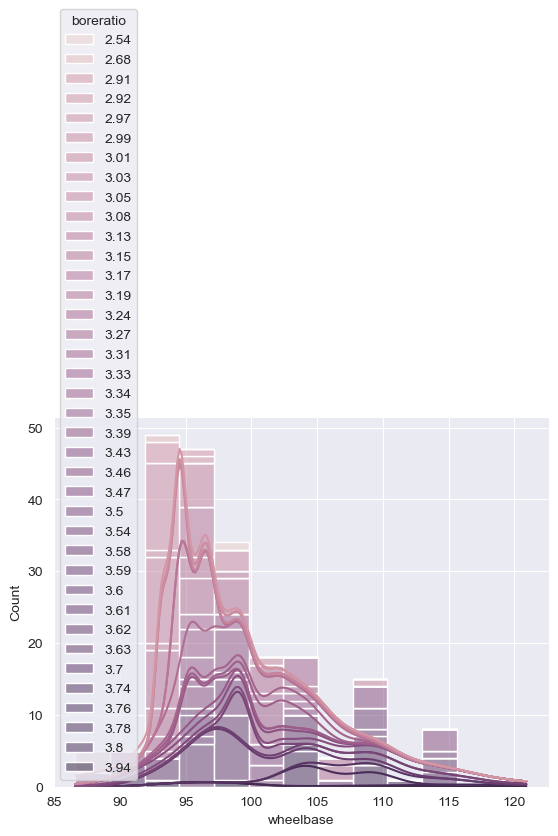

In [47]:
import seaborn as sns
sns.set_style("darkgrid")
sns.histplot(data=data,x='wheelbase',kde=True,hue='boreratio',multiple='stack')

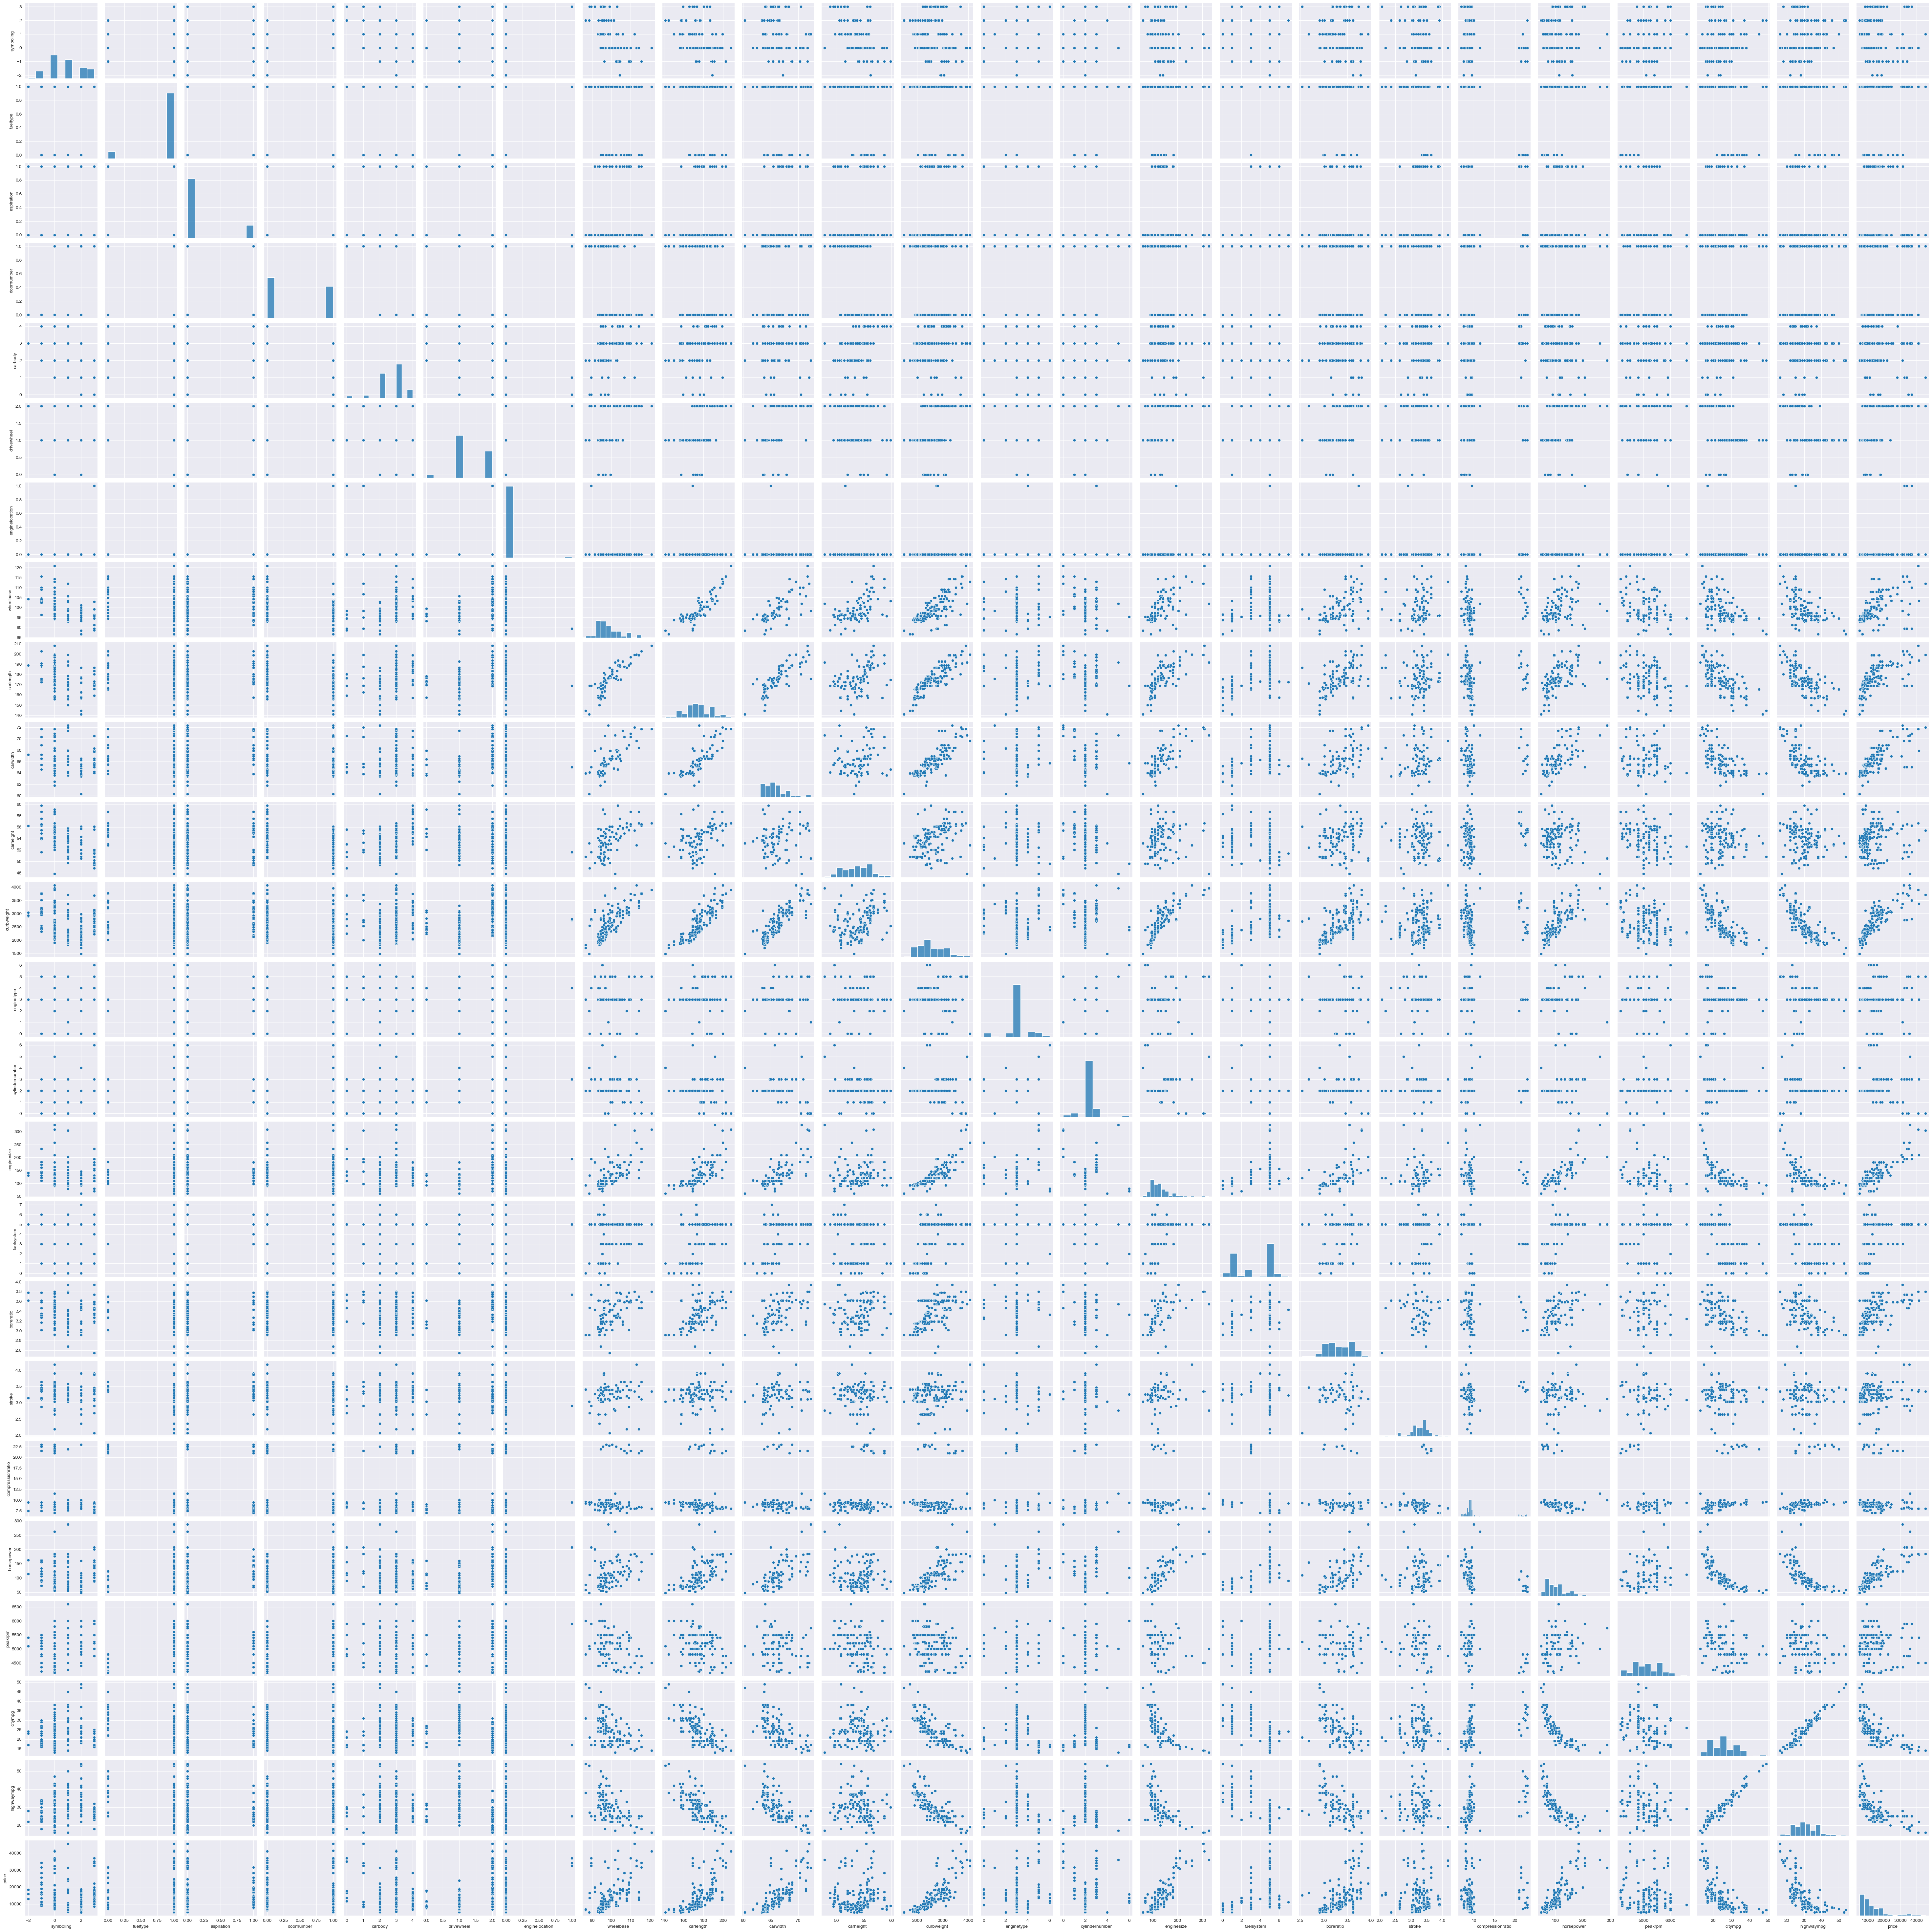

In [49]:
sns.pairplot(data)